# Create config experiment files

In [9]:
from bct import score_wu, rich_club_wu
import numpy as np
from scipy.io import loadmat
from pathlib import Path
import yaml

project_root = Path.cwd().parent

C = np.loadtxt(("../data/SCs/Averaged_SCs/aal/healthy_average.csv"),delimiter=',')

C = 0.2*C/np.max(C)
node_strength = np.mean(C,axis=0)
# Get the 10 lowest regions
most_connected = np.argsort(node_strength)[::-1]

score_levels = np.arange(0.02,1.6,0.01)
score_idxs = []
scores = []
sn_s = []
for level in score_levels:
    score, sn = score_wu(C,level)
    # Get the indices from score that have > 0 values
    if sn>0:
        score_idxs.append(np.where(np.sum(score,axis=0) > 0)[0])
        scores.append(score)
        sn_s.append(sn)

G_VAL = 3.55
LR_HOMO = 1500
LR_HET = 100
score_lengths = [len(x) for x in score_idxs]
cherry_pick_scores_idx = [-1,-4,-8,-9]
amount_of_regions = [score_lengths[x] for x in cherry_pick_scores_idx ]
print(set(sn_s))

LR_HOMO_VEC = np.ones(C.shape[0])*LR_HOMO
CONNECTED_VECTORS = np.zeros((len(cherry_pick_scores_idx), C.shape[0]))
# Create HOMO High with strongest regions
for NTH_IDX,NTH in enumerate(amount_of_regions):
    print(f"Doing for {NTH} regions")
    SELECTED_REGIONS = most_connected[:NTH]
    LR_HET_VEC = LR_HOMO_VEC.copy()
    LR_HET_VEC[SELECTED_REGIONS] = LR_HET
    CONNECTED_VECTORS[NTH_IDX] = LR_HET_VEC
    print(LR_HET_VEC)


SCORE_VECTORS = np.zeros((len(cherry_pick_scores_idx), C.shape[0]))
for NTH_IDX,NTH in enumerate(cherry_pick_scores_idx):
    print(f"Doing for {NTH} regions")
    SELECTED_REGIONS = score_idxs[NTH]
    LR_HET_VEC = LR_HOMO_VEC.copy()
    LR_HET_VEC[SELECTED_REGIONS] = LR_HET    
    SCORE_VECTORS[NTH_IDX] = LR_HET_VEC
    print(LR_HET_VEC)


SELECTED_REGIONS_VECTOR = []
RANDOM_VECTORS = np.zeros((len(cherry_pick_scores_idx), C.shape[0]))
for NTH_IDX,NTH in enumerate(cherry_pick_scores_idx):
    print(f"Doing for {NTH} regions")
    SELECTED_REGIONS = np.random.choice(C.shape[0], size=amount_of_regions[NTH_IDX], replace=False)
    SELECTED_REGIONS_VECTOR.append(SELECTED_REGIONS)
    LR_HET_VEC = LR_HOMO_VEC.copy()
    LR_HET_VEC[SELECTED_REGIONS] = LR_HET    
    RANDOM_VECTORS[NTH_IDX] = LR_HET_VEC
    print(LR_HET_VEC)

{66, 9, 10, 81, 88, 90}
Doing for 9 regions
[1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500.
 1500. 1500.  100. 1500. 1500.  100. 1500. 1500. 1500. 1500. 1500. 1500.
 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500.  100. 1500. 1500.
  100. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500.
 1500. 1500. 1500. 1500. 1500.  100. 1500. 1500.  100. 1500. 1500. 1500.
 1500. 1500. 1500. 1500. 1500. 1500. 1500.  100.  100. 1500. 1500. 1500.
  100. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500.
 1500. 1500. 1500. 1500. 1500. 1500.]
Doing for 10 regions
[1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500.
 1500. 1500.  100. 1500. 1500.  100. 1500. 1500. 1500. 1500. 1500. 1500.
 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500.  100. 1500. 1500.
  100. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500.
 1500. 1500. 1500. 1500. 1500.  100. 1500. 1500.  100. 1500. 1500. 1500.
 1500. 1500. 1500. 15

In [10]:

config = {
    'experiment': {
        'description': f'Running Chimeras with LR_HOM={LR_HOMO}',
        'version': '1.0'
    },
    'data': {
        'sc_root': 'Averaged_SCs/aal',
        'test_mode': False,
        'max_subjects_test': 1
    },
    'simulation': {
        'nb_steps': 100000,
        'TR': 2.4,
        'obj_rate': 3.44,
        'with_decay': True,
        'with_plasticity': True,
        'flp': 0.01,
        'fhp': 0.1,
        'burnout': 8,
        'G': G_VAL,
        'lrj': LR_HOMO,
        'over': {
            'seed': {
                'fun': 'np.arange',
                'args': [1, 101, 1]
            }
        },
        'parallel': True,
        'averaged': False
    },    
    'output': {
        'results_dir': 'AAL_HDMF_PAPER',
        'save_full_outputs': True,
        'observables': [
            {'name': 'max_freq_power', 'signal': 'rates', 'params': {'return_psd': True}},                    
        ]
    }
}

config_path = project_root / 'configs' / 'experiments' / 'chimeras' / 'g355_lr100-1500' / f'G355_HOMO-{LR_HOMO}.yaml'
config_path.parent.mkdir(parents=True, exist_ok=True)

with open(config_path, 'w') as f:
    yaml.dump(config, f, default_flow_style=False)

In [11]:


tasks_list = [
    {'lr_vector': vector.tolist()}
    for vector in CONNECTED_VECTORS
]

config['tasks_list'] = tasks_list

config_path = project_root / 'configs' / 'experiments' / 'chimeras' / 'g355_lr100-1500' / f'G355_HOMO-{LR_HOMO}_HET-{LR_HET}_Connected.yaml'
config_path.parent.mkdir(parents=True, exist_ok=True)

with open(config_path, 'w') as f:
    yaml.dump(config, f, default_flow_style=False)

tasks_list = [
    {'lr_vector': vector.tolist()}
    for vector in SCORE_VECTORS
]

config['tasks_list'] = tasks_list

config_path = project_root / 'configs' / 'experiments' / 'chimeras' / 'g355_lr100-1500' / f'G355_HOMO-{LR_HOMO}_HET-{LR_HET}_SCORE.yaml'
config_path.parent.mkdir(parents=True, exist_ok=True)

with open(config_path, 'w') as f:
    yaml.dump(config, f, default_flow_style=False)


tasks_list = [
    {'lr_vector': vector.tolist()}
    for vector in RANDOM_VECTORS
]


config['tasks_list'] = tasks_list

regions_list = [
    {'selection': selection.tolist()}
     for selection in SELECTED_REGIONS_VECTOR
]

config['simulation']['selected_regions'] = regions_list

config_path = project_root / 'configs' / 'experiments' / 'chimeras' / 'g355_lr100-1500' / f'G355_HOMO-{LR_HOMO}_HET-{LR_HET}_RANDOM.yaml'
config_path.parent.mkdir(parents=True, exist_ok=True)

with open(config_path, 'w') as f:
    yaml.dump(config, f, default_flow_style=False)



In [12]:
LR_HOMO = 100
LR_HET = 1500
config['experiment']['description'] = f'Running Chimeras with LR_HOM={LR_HOMO}'
config['simulation']['lrj'] = LR_HOMO

# Eliminate the tasks_list from config
if 'tasks_list' in config:
    del config['tasks_list']

config_path = project_root / 'configs' / 'experiments' /'chimeras' / 'g355_lr100-1500' / f'G355_HOMO-{LR_HOMO}.yaml'
config_path.parent.mkdir(parents=True, exist_ok=True)

with open(config_path, 'w') as f:
    yaml.dump(config, f, default_flow_style=False)



LR_HOMO_VEC = np.ones(C.shape[0])*LR_HOMO
CONNECTED_VECTORS = np.zeros((len(cherry_pick_scores_idx), C.shape[0]))
# Create HOMO High with strongest regions
for NTH_IDX,NTH in enumerate(amount_of_regions):
    print(f"Doing for {NTH} regions")
    SELECTED_REGIONS = most_connected[:NTH]
    LR_HET_VEC = LR_HOMO_VEC.copy()
    LR_HET_VEC[SELECTED_REGIONS] = LR_HET
    CONNECTED_VECTORS[NTH_IDX] = LR_HET_VEC
    print(LR_HET_VEC)

tasks_list = [
    {'lr_vector': vector.tolist()}
    for vector in CONNECTED_VECTORS
]


config['tasks_list'] = tasks_list

config['experiment']['description'] = f'Running Chimeras with LR_HOM={LR_HOMO} LR_HET={LR_HET} choosing regions according to connectivity strength'

config_path = project_root / 'configs' / 'experiments' / 'chimeras' / 'g355_lr100-1500' / f'G355_HOMO-{LR_HOMO}_HET-{LR_HET}_Connected.yaml'

config_path.parent.mkdir(parents=True, exist_ok=True)

with open(config_path, 'w') as f:
    yaml.dump(config, f, default_flow_style=False)

SCORE_VECTORS = np.zeros((len(cherry_pick_scores_idx), C.shape[0]))
for NTH_IDX,NTH in enumerate(cherry_pick_scores_idx):
    print(f"Doing for {NTH} regions")
    SELECTED_REGIONS = score_idxs[NTH]
    LR_HET_VEC = LR_HOMO_VEC.copy()
    LR_HET_VEC[SELECTED_REGIONS] = LR_HET    
    SCORE_VECTORS[NTH_IDX] = LR_HET_VEC
    print(LR_HET_VEC)


tasks_list = [
    {'lr_vector': vector.tolist()}
    for vector in SCORE_VECTORS
]

config['tasks_list'] = tasks_list

config['experiment']['description'] = f'Running Chimeras with LR_HOM={LR_HOMO} LR_HET={LR_HET} choosing regions according to SCORE'

config_path = project_root / 'configs' / 'experiments' / 'chimeras' / 'g355_lr100-1500' / f'G355_HOMO-{LR_HOMO}_HET-{LR_HET}_SCORE.yaml'

config_path.parent.mkdir(parents=True, exist_ok=True)

with open(config_path, 'w') as f:
    yaml.dump(config, f, default_flow_style=False)


SELECTED_REGIONS_VECTOR = []
RANDOM_VECTORS = np.zeros((len(cherry_pick_scores_idx), C.shape[0]))
for NTH_IDX,NTH in enumerate(cherry_pick_scores_idx):
    print(f"Doing for {NTH} regions")
    SELECTED_REGIONS = np.random.choice(C.shape[0], size=amount_of_regions[NTH_IDX], replace=False)
    SELECTED_REGIONS_VECTOR.append(SELECTED_REGIONS)
    LR_HET_VEC = LR_HOMO_VEC.copy()
    LR_HET_VEC[SELECTED_REGIONS] = LR_HET    
    RANDOM_VECTORS[NTH_IDX] = LR_HET_VEC
    print(LR_HET_VEC)


tasks_list = [
    {'lr_vector': vector.tolist()}
    for vector in RANDOM_VECTORS
]

config['tasks_list'] = tasks_list

config['experiment']['description'] = f'Running Chimeras with LR_HOM={LR_HOMO} LR_HET={LR_HET} choosing regions according to RANDOM'


regions_list = [
    {'selection': selection.tolist()}
     for selection in SELECTED_REGIONS_VECTOR
]

config['simulation']['selected_regions'] = regions_list

config_path = project_root / 'configs' / 'experiments' / 'chimeras' / 'g355_lr100-1500' / f'G355_HOMO-{LR_HOMO}_HET-{LR_HET}_RANDOM.yaml'

config_path.parent.mkdir(parents=True, exist_ok=True)

with open(config_path, 'w') as f:
    yaml.dump(config, f, default_flow_style=False)


Doing for 9 regions
[ 100.  100.  100.  100.  100.  100.  100.  100.  100.  100.  100.  100.
  100.  100. 1500.  100.  100. 1500.  100.  100.  100.  100.  100.  100.
  100.  100.  100.  100.  100.  100.  100.  100.  100. 1500.  100.  100.
 1500.  100.  100.  100.  100.  100.  100.  100.  100.  100.  100.  100.
  100.  100.  100.  100.  100. 1500.  100.  100. 1500.  100.  100.  100.
  100.  100.  100.  100.  100.  100.  100. 1500. 1500.  100.  100.  100.
 1500.  100.  100.  100.  100.  100.  100.  100.  100.  100.  100.  100.
  100.  100.  100.  100.  100.  100.]
Doing for 10 regions
[ 100.  100.  100.  100.  100.  100.  100.  100.  100.  100.  100.  100.
  100.  100. 1500.  100.  100. 1500.  100.  100.  100.  100.  100.  100.
  100.  100.  100.  100.  100.  100.  100.  100.  100. 1500.  100.  100.
 1500.  100.  100.  100.  100.  100.  100.  100.  100.  100.  100.  100.
  100.  100.  100.  100.  100. 1500.  100.  100. 1500.  100.  100.  100.
  100.  100.  100.  100.  100.  100.  100. 15

# Load results

In [2]:
from fastHDMF.experiment_manager import ExperimentManager
exp_hom_100 = ExperimentManager(project_root, experiment_id="Chimera_HOMO-100", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res_hom_100 = exp_hom_100.load_experiment_results()

exp_hom_1000 = ExperimentManager(project_root, experiment_id="Chimera_HOMO-1000", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res_hom_1000 = exp_hom_1000.load_experiment_results()

exp_hom_100_het_1000_connected = ExperimentManager(project_root, experiment_id="Chimera_HOMO-100_HET-1000_Connected", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res_hom_100_het_1000_connected = exp_hom_100_het_1000_connected.load_experiment_results()

exp_hom_100_het_1000_score = ExperimentManager(project_root, experiment_id="Chimera_HOMO-100_HET-1000_SCORE", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res_hom_100_het_1000_score = exp_hom_100_het_1000_score.load_experiment_results()

exp_hom_1000_het_100_connected = ExperimentManager(project_root, experiment_id="Chimera_HOMO-1000_HET-100_Connected", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res_hom_1000_het_100_connected = exp_hom_1000_het_100_connected.load_experiment_results()

exp_hom_1000_het_100_score = ExperimentManager(project_root, experiment_id="Chimera_HOMO-1000_HET-100_SCORE", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res_hom_1000_het_100_score = exp_hom_1000_het_100_score.load_experiment_results()

2025-10-21 11:42:54,680 - hdmf_experiment_Chimera_HOMO-100 - INFO - Experiment 'Chimera_HOMO-100' initialized
2025-10-21 11:42:54,682 - hdmf_experiment_Chimera_HOMO-100 - INFO - Config: Running Chimeras with LR_HOM=100
2025-10-21 11:42:54,683 - hdmf_experiment_Chimera_HOMO-100 - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/Chimera_HOMO-100
2025-10-21 11:42:54,706 - hdmf_experiment_Chimera_HOMO-100 - INFO - Loaded SC matrices for 1 patients from AAL with config threshold 0
2025-10-21 11:42:54,711 - hdmf_experiment_Chimera_HOMO-100 - INFO - Searching for config file: Chimera_HOMO-100.yaml
2025-10-21 11:42:54,713 - hdmf_experiment_Chimera_HOMO-100 - INFO - Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
2025-10-21 11:42:54,719 - hdmf_experiment_Chimera_HOMO-100 - INFO - Chimera_HOMO-100
2025-10-21 11:42:54,721 - hdmf_experiment_Chimera_HOMO-100 - INFO - Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/config

INFO: Searching for config file: Chimera_HOMO-100.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: Chimera_HOMO-100
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Chimera_HOMO-100.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Chimera_HOMO-100.yaml
Creating IPP list from SC matrices in: AAL
Found 1 IPPs from SC matrices


2025-10-21 11:42:54,875 - hdmf_experiment_Chimera_HOMO-1000 - INFO - Experiment 'Chimera_HOMO-1000' initialized
2025-10-21 11:42:54,877 - hdmf_experiment_Chimera_HOMO-1000 - INFO - Config: Running Chimeras with LR_HOM=1000
2025-10-21 11:42:54,878 - hdmf_experiment_Chimera_HOMO-1000 - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/Chimera_HOMO-1000
2025-10-21 11:42:54,901 - hdmf_experiment_Chimera_HOMO-1000 - INFO - Loaded SC matrices for 1 patients from AAL with config threshold 0
2025-10-21 11:42:54,905 - hdmf_experiment_Chimera_HOMO-1000 - INFO - Searching for config file: Chimera_HOMO-1000.yaml
2025-10-21 11:42:54,906 - hdmf_experiment_Chimera_HOMO-1000 - INFO - Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
2025-10-21 11:42:54,911 - hdmf_experiment_Chimera_HOMO-1000 - INFO - Chimera_HOMO-1000
2025-10-21 11:42:54,912 - hdmf_experiment_Chimera_HOMO-1000 - INFO - Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fa

INFO: Searching for config file: Chimera_HOMO-1000.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: Chimera_HOMO-1000
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Chimera_HOMO-1000.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Chimera_HOMO-1000.yaml
Creating IPP list from SC matrices in: AAL
Found 1 IPPs from SC matrices
INFO: Searching for config file: Chimera_HOMO-100_HET-1000_Connected.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: Chimera_HOMO-100_HET-1000_Connected
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Chimera_HOMO-100_HET-1000_Connected.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Chimera_HOMO-100_HET-1000_Connected.yaml


2025-10-21 11:42:55,064 - hdmf_experiment_Chimera_HOMO-100_HET-1000_Connected - INFO - Experiment 'Chimera_HOMO-100_HET-1000_Connected' initialized
2025-10-21 11:42:55,065 - hdmf_experiment_Chimera_HOMO-100_HET-1000_Connected - INFO - Config: Running Chimeras with LR_HOM=100 LR_HET=1000 choosing regions according to connectivity strength
2025-10-21 11:42:55,066 - hdmf_experiment_Chimera_HOMO-100_HET-1000_Connected - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/Chimera_HOMO-100_HET-1000_Connected
2025-10-21 11:42:55,075 - hdmf_experiment_Chimera_HOMO-100_HET-1000_Connected - INFO - Loaded SC matrices for 1 patients from AAL with config threshold 0
2025-10-21 11:42:55,078 - hdmf_experiment_Chimera_HOMO-100_HET-1000_Connected - INFO - Searching for config file: Chimera_HOMO-100_HET-1000_Connected.yaml
2025-10-21 11:42:55,079 - hdmf_experiment_Chimera_HOMO-100_HET-1000_Connected - INFO - Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
2025

Creating IPP list from SC matrices in: AAL
Found 1 IPPs from SC matrices


2025-10-21 11:42:55,721 - hdmf_experiment_Chimera_HOMO-100_HET-1000_SCORE - INFO - Experiment 'Chimera_HOMO-100_HET-1000_SCORE' initialized
2025-10-21 11:42:55,722 - hdmf_experiment_Chimera_HOMO-100_HET-1000_SCORE - INFO - Config: Running Chimeras with LR_HOM=100 LR_HET=1000 choosing regions according to SCORE
2025-10-21 11:42:55,723 - hdmf_experiment_Chimera_HOMO-100_HET-1000_SCORE - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/Chimera_HOMO-100_HET-1000_SCORE
2025-10-21 11:42:55,732 - hdmf_experiment_Chimera_HOMO-100_HET-1000_SCORE - INFO - Loaded SC matrices for 1 patients from AAL with config threshold 0
2025-10-21 11:42:55,735 - hdmf_experiment_Chimera_HOMO-100_HET-1000_SCORE - INFO - Searching for config file: Chimera_HOMO-100_HET-1000_SCORE.yaml
2025-10-21 11:42:55,736 - hdmf_experiment_Chimera_HOMO-100_HET-1000_SCORE - INFO - Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
2025-10-21 11:42:55,741 - hdmf_experiment_Chimera_HOMO-1

INFO: Searching for config file: Chimera_HOMO-100_HET-1000_SCORE.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: Chimera_HOMO-100_HET-1000_SCORE
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Chimera_HOMO-100_HET-1000_SCORE.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Chimera_HOMO-100_HET-1000_SCORE.yaml
Creating IPP list from SC matrices in: AAL
Found 1 IPPs from SC matrices


2025-10-21 11:42:56,410 - hdmf_experiment_Chimera_HOMO-1000_HET-100_Connected - INFO - Experiment 'Chimera_HOMO-1000_HET-100_Connected' initialized
2025-10-21 11:42:56,411 - hdmf_experiment_Chimera_HOMO-1000_HET-100_Connected - INFO - Config: Running Chimeras with LR_HOM=1000
2025-10-21 11:42:56,412 - hdmf_experiment_Chimera_HOMO-1000_HET-100_Connected - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/Chimera_HOMO-1000_HET-100_Connected
2025-10-21 11:42:56,421 - hdmf_experiment_Chimera_HOMO-1000_HET-100_Connected - INFO - Loaded SC matrices for 1 patients from AAL with config threshold 0
2025-10-21 11:42:56,424 - hdmf_experiment_Chimera_HOMO-1000_HET-100_Connected - INFO - Searching for config file: Chimera_HOMO-1000_HET-100_Connected.yaml
2025-10-21 11:42:56,425 - hdmf_experiment_Chimera_HOMO-1000_HET-100_Connected - INFO - Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
2025-10-21 11:42:56,430 - hdmf_experiment_Chimera_HOMO-1000_HET-100

INFO: Searching for config file: Chimera_HOMO-1000_HET-100_Connected.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: Chimera_HOMO-1000_HET-100_Connected
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Chimera_HOMO-1000_HET-100_Connected.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Chimera_HOMO-1000_HET-100_Connected.yaml
Creating IPP list from SC matrices in: AAL
Found 1 IPPs from SC matrices


2025-10-21 11:42:57,084 - hdmf_experiment_Chimera_HOMO-1000_HET-100_SCORE - INFO - Experiment 'Chimera_HOMO-1000_HET-100_SCORE' initialized
2025-10-21 11:42:57,086 - hdmf_experiment_Chimera_HOMO-1000_HET-100_SCORE - INFO - Config: Running Chimeras with LR_HOM=1000
2025-10-21 11:42:57,087 - hdmf_experiment_Chimera_HOMO-1000_HET-100_SCORE - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/Chimera_HOMO-1000_HET-100_SCORE
2025-10-21 11:42:57,097 - hdmf_experiment_Chimera_HOMO-1000_HET-100_SCORE - INFO - Loaded SC matrices for 1 patients from AAL with config threshold 0
2025-10-21 11:42:57,100 - hdmf_experiment_Chimera_HOMO-1000_HET-100_SCORE - INFO - Searching for config file: Chimera_HOMO-1000_HET-100_SCORE.yaml
2025-10-21 11:42:57,101 - hdmf_experiment_Chimera_HOMO-1000_HET-100_SCORE - INFO - Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
2025-10-21 11:42:57,105 - hdmf_experiment_Chimera_HOMO-1000_HET-100_SCORE - INFO - Chimera_HOMO-1000_HE

INFO: Searching for config file: Chimera_HOMO-1000_HET-100_SCORE.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: Chimera_HOMO-1000_HET-100_SCORE
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Chimera_HOMO-1000_HET-100_SCORE.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Chimera_HOMO-1000_HET-100_SCORE.yaml
Creating IPP list from SC matrices in: AAL
Found 1 IPPs from SC matrices


In [3]:
max_freqs_all_low_lr = np.squeeze(res_hom_100['full_results']['observables']['max_freqs_rates'])
max_freqs_all_high_lr = np.squeeze(res_hom_1000['full_results']['observables']['max_freqs_rates'])

max_freqs_all_het_100_connected = res_hom_1000_het_100_connected['full_results']['observables']['max_freqs_rates']
max_freqs_all_het_1000_connected = res_hom_100_het_1000_connected['full_results']['observables']['max_freqs_rates']

quimeric_delta_connected_100 = np.zeros((len(amount_of_regions), C.shape[0]))
for NTH_IDX,NTH in enumerate(amount_of_regions):
    quimeric_delta_connected_100[NTH_IDX] = 2 * (max_freqs_all_het_100_connected[NTH_IDX].mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) / (max_freqs_all_high_lr.mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) - 1

quimeric_delta_connected_1000 = np.zeros((len(amount_of_regions), C.shape[0]))
for NTH_IDX,NTH in enumerate(amount_of_regions):
    quimeric_delta_connected_1000[NTH_IDX] = 2 * (max_freqs_all_het_1000_connected[NTH_IDX].mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) / (max_freqs_all_high_lr.mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) - 1


max_freqs_all_het_100_score = res_hom_1000_het_100_score['full_results']['observables']['max_freqs_rates']
max_freqs_all_het_1000_score = res_hom_100_het_1000_score['full_results']['observables']['max_freqs_rates']

quimeric_delta_score_100 = np.zeros((len(amount_of_regions), C.shape[0]))
for NTH_IDX,NTH in enumerate(amount_of_regions):
    quimeric_delta_score_100[NTH_IDX] = 2 * (max_freqs_all_het_100_score[NTH_IDX].mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) / (max_freqs_all_high_lr.mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) - 1

quimeric_delta_score_1000 = np.zeros((len(amount_of_regions), C.shape[0]))
for NTH_IDX,NTH in enumerate(amount_of_regions):
    quimeric_delta_score_1000[NTH_IDX] = 2 * (max_freqs_all_het_1000_score[NTH_IDX].mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) / (max_freqs_all_high_lr.mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) - 1

Significant difference for 9 regions: p-value = 0.0097
Significant difference for 10 regions: p-value = 0.0019


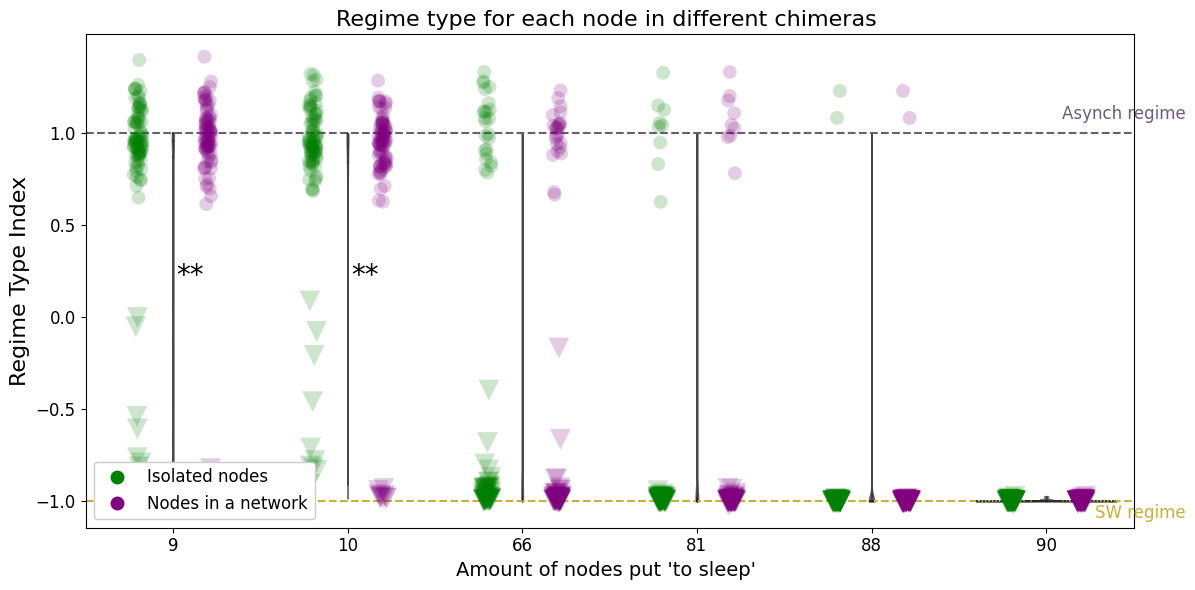

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
col_pal_sw_asynch = ['#C9B037','#6C5B7B']
from scipy.stats import ttest_ind
from matplotlib.lines import Line2D

LABEL = 14
TITLE = 16
TICKS = 12


quimeric_delta = quimeric_delta_connected_100
quimeric_delta_score = quimeric_delta_score_100
N = C.shape[0]

# Parameters
figname = 'FIG_6_C'
# 1) Build the actual selections for each amount
str_selections   = [most_connected[:N]        for N in amount_of_regions]
score_selections = [score_idxs[idx]           for idx in cherry_pick_scores_idx]
# 2) Turn them into Boolean masks of shape (n_amounts, n_regions)
str_mask   = np.array([[r in sel for r in range(N)] for sel in str_selections])
score_mask = np.array([[r in sel for r in range(N)] for sel in score_selections])
# 3) Flatten everything into one long vector
values        = np.concatenate([quimeric_delta.ravel(),        quimeric_delta_score.ravel()])
groups        = ['STR']   * quimeric_delta.size + ['S-CORE'] * quimeric_delta_score.size
amounts       = np.concatenate([
                    np.repeat(amount_of_regions, N),
                    np.repeat(amount_of_regions, N)
               ])
selected_flag = np.concatenate([str_mask.ravel(), score_mask.ravel()])


# 4) Build the DataFrame
data = pd.DataFrame({
    'value'             : values,
    'group'             : groups,
    'amount_of_regions' : amounts,
    'selected'          : selected_flag
})
# Create the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Add dashed lines
ax.axhline(y=1, color=col_pal_sw_asynch[1], linestyle='--')
ax.text(5.8, 1.08, 'Asynch regime', color=col_pal_sw_asynch[1], fontsize=12, ha='right')

ax.axhline(y=-1, color=col_pal_sw_asynch[0], linestyle='--')
ax.text(5.8, -1.09, 'SW regime', color=col_pal_sw_asynch[0], fontsize=12, ha='right')

# Strip plot for all those that were not selected

data_non = data[data['selected'] == False]  # Filter out selected regions
# Strip plot
sns.stripplot(data=data_non, x='amount_of_regions', 
              y='value', hue='group', jitter=0.05, dodge=True, ax=ax, marker='o',linewidth=0,edgecolor=None,
              palette=['green', 'purple'], s=10, alpha=0.2)
# Stripplot on top of the same axes for selected regions
data_sel = data[data['selected'] == True]  # Filter out selected regions
# Strip plot for selected regions
sns.stripplot(data=data_sel, x='amount_of_regions', 
              y='value', hue='group', jitter=0.05, dodge=True, ax=ax, marker='v', linewidth=0,edgecolor=None,
              palette=['green', 'purple'], s=15, alpha=0.2)
strip_handles, strip_labels = ax.get_legend_handles_labels()
for h in strip_handles:
    h.set_alpha(1.0)

# Add a 'v' marker to the strip handle without any color
# add a red 'v' marker for the "Selected regions" legend entry
selected_handle = Line2D([0], [0],
                         marker='v',
                         markerfacecolor='grey',     
                         markeredgecolor='None',                    
                         linestyle='None',
                         markersize=10)

non_selected_handle = Line2D([0], [0],
                         marker='o',
                         markerfacecolor='grey',                         
                            markeredgecolor='None',
                         linestyle='None',
                         markersize=10)

selected_handles = [selected_handle, non_selected_handle]
selected_labels = ["Nodes put 'to sleep'", "Nodes 'awake'"]


# Violin plot
# Clip the data from 1 to -1
data['value'] = np.clip(data['value'], -1, 1)
sns.violinplot(data=data, x='amount_of_regions', y='value', hue='group', ax=ax, 
               palette=['green', 'purple'], split=True, inner='quartile', bw_method=0.1,cut=0, alpha=0.6)

# Statistical tests: compare STR and S-CORE per amount_of_regions.
unique_amounts = sorted(data['amount_of_regions'].unique())

for idx_amt,amt in enumerate(unique_amounts):
    subset = data[data['amount_of_regions'] == amt]
    values_str = subset[subset['group'] == 'STR']
    values_score = subset[subset['group'] == 'S-CORE']
    values_str = values_str[values_str['selected']]['value']
    values_score = values_score[values_score['selected']]['value']
    stat, p_val = ttest_ind(values_str, values_score)
    if p_val < 0.05:
        print(f"Significant difference for {amt} regions: p-value = {p_val:.4f}")
        y_max = subset['value'].max()
        # Annotate star above the max value with a small offset
        ax.text(0.1+idx_amt, 0.15, '**' if p_val<0.01 else '*' , ha='center', va='bottom', color='black', fontsize=20)

# Labels, title, and legend
ax.set_xlabel("Amount of nodes put 'to sleep' ", fontsize=LABEL)
ax.set_ylabel("Regime Type Index", fontsize=LABEL+2)
ax.set_title("Regime type for each node in different chimeras ", fontsize=TITLE)
ax.tick_params(axis='both', labelsize=TICKS)
ax.set_yticks([1, 0.5, 0, -0.5, -1])
# First legend: isolated vs network nodes
first_legend = ax.legend(
    strip_handles,
    ["Isolated nodes", "Nodes in a network"],
    fontsize=12,
    title_fontsize=14,
    loc='lower left',
    framealpha=1
)

# Layout and save
plt.tight_layout()
#fig.savefig(os.path.join(figfold, figname + '.svg'), dpi=300)
#fig.savefig(os.path.join(figfold, figname + '.png'), dpi=300)
plt.show()



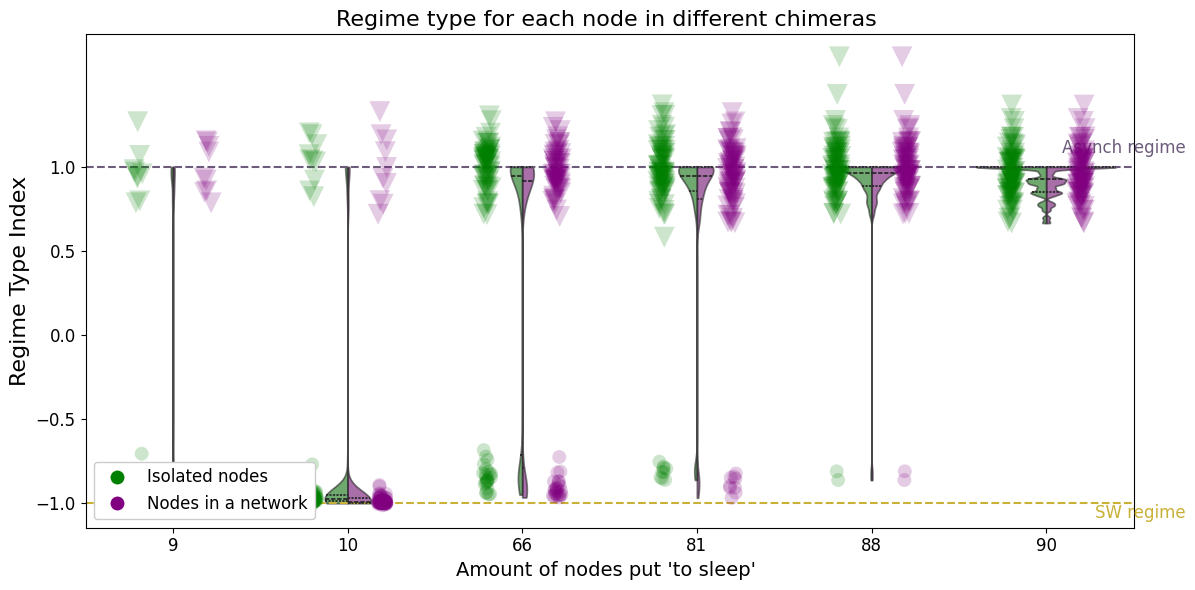

In [37]:
quimeric_delta = quimeric_delta_connected_1000
quimeric_delta_score = quimeric_delta_score_1000
N = C.shape[0]

# Parameters
figname = 'FIG_6_D'
# 1) Build the actual selections for each amount
str_selections   = [most_connected[:N]        for N in amount_of_regions]
score_selections = [score_idxs[idx]           for idx in cherry_pick_scores_idx]
# 2) Turn them into Boolean masks of shape (n_amounts, n_regions)
str_mask   = np.array([[r in sel for r in range(N)] for sel in str_selections])
score_mask = np.array([[r in sel for r in range(N)] for sel in score_selections])
# 3) Flatten everything into one long vector
values        = np.concatenate([quimeric_delta.ravel(),        quimeric_delta_score.ravel()])
groups        = ['STR']   * quimeric_delta.size + ['S-CORE'] * quimeric_delta_score.size
amounts       = np.concatenate([
                    np.repeat(amount_of_regions, N),
                    np.repeat(amount_of_regions, N)
               ])
selected_flag = np.concatenate([str_mask.ravel(), score_mask.ravel()])


# 4) Build the DataFrame
data = pd.DataFrame({
    'value'             : values,
    'group'             : groups,
    'amount_of_regions' : amounts,
    'selected'          : selected_flag
})
# Create the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Add dashed lines
ax.axhline(y=1, color=col_pal_sw_asynch[1], linestyle='--')
ax.text(5.8, 1.08, 'Asynch regime', color=col_pal_sw_asynch[1], fontsize=12, ha='right')

ax.axhline(y=-1, color=col_pal_sw_asynch[0], linestyle='--')
ax.text(5.8, -1.09, 'SW regime', color=col_pal_sw_asynch[0], fontsize=12, ha='right')

# Strip plot for all those that were not selected

data_non = data[data['selected'] == False]  # Filter out selected regions
# Strip plot
sns.stripplot(data=data_non, x='amount_of_regions', 
              y='value', hue='group', jitter=0.05, dodge=True, ax=ax, marker='o',linewidth=0,edgecolor=None,
              palette=['green', 'purple'], s=10, alpha=0.2)
# Stripplot on top of the same axes for selected regions
data_sel = data[data['selected'] == True]  # Filter out selected regions
# Strip plot for selected regions
sns.stripplot(data=data_sel, x='amount_of_regions', 
              y='value', hue='group', jitter=0.05, dodge=True, ax=ax, marker='v', linewidth=0,edgecolor=None,
              palette=['green', 'purple'], s=15, alpha=0.2)
strip_handles, strip_labels = ax.get_legend_handles_labels()
for h in strip_handles:
    h.set_alpha(1.0)

# Add a 'v' marker to the strip handle without any color
# add a red 'v' marker for the "Selected regions" legend entry
selected_handle = Line2D([0], [0],
                         marker='v',
                         markerfacecolor='grey',     
                         markeredgecolor='None',                    
                         linestyle='None',
                         markersize=10)

non_selected_handle = Line2D([0], [0],
                         marker='o',
                         markerfacecolor='grey',                         
                            markeredgecolor='None',
                         linestyle='None',
                         markersize=10)

selected_handles = [selected_handle, non_selected_handle]
selected_labels = ["Nodes put 'to sleep'", "Nodes 'awake'"]


# Violin plot
# Clip the data from 1 to -1
data['value'] = np.clip(data['value'], -1, 1)
sns.violinplot(data=data, x='amount_of_regions', y='value', hue='group', ax=ax, 
               palette=['green', 'purple'], split=True, inner='quartile', bw_method=0.1,cut=0, alpha=0.6)

# Statistical tests: compare STR and S-CORE per amount_of_regions.
unique_amounts = sorted(data['amount_of_regions'].unique())

for idx_amt,amt in enumerate(unique_amounts):
    subset = data[data['amount_of_regions'] == amt]
    values_str = subset[subset['group'] == 'STR']
    values_score = subset[subset['group'] == 'S-CORE']
    values_str = values_str[values_str['selected']]['value']
    values_score = values_score[values_score['selected']]['value']
    stat, p_val = ttest_ind(values_str, values_score)
    if p_val < 0.05:
        print(f"Significant difference for {amt} regions: p-value = {p_val:.4f}")
        y_max = subset['value'].max()
        # Annotate star above the max value with a small offset
        ax.text(0.1+idx_amt, 0.15, '**' if p_val<0.01 else '*' , ha='center', va='bottom', color='black', fontsize=20)

# Labels, title, and legend
ax.set_xlabel("Amount of nodes put 'to sleep' ", fontsize=LABEL)
ax.set_ylabel("Regime Type Index", fontsize=LABEL+2)
ax.set_title("Regime type for each node in different chimeras ", fontsize=TITLE)
ax.tick_params(axis='both', labelsize=TICKS)
ax.set_yticks([1, 0.5, 0, -0.5, -1])
# First legend: isolated vs network nodes
first_legend = ax.legend(
    strip_handles,
    ["Isolated nodes", "Nodes in a network"],
    fontsize=12,
    title_fontsize=14,
    loc='lower left',
    framealpha=1
)

# Layout and save
plt.tight_layout()
#fig.savefig(os.path.join(figfold, figname + '.svg'), dpi=300)
#fig.savefig(os.path.join(figfold, figname + '.png'), dpi=300)
plt.show()

